<a href="https://colab.research.google.com/github/kibeert/potential-eureka/blob/K-mean_clustering/K_means_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
#

In [2]:
df = pd.read_csv("driver-data.csv")

In [3]:
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [4]:
df.head(10
      )

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
5,3423313857,41.91,10
6,3423312432,58.64,20
7,3423311434,52.02,8
8,3423311328,31.25,34
9,3423312488,44.31,19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df_analyze = df.drop( 'id', axis= 1)
kmeans.fit(df_analyze)

KMeans(n_clusters=3)

In [23]:
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154],
       [180.34311782,  10.52011494]])

In [24]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 2 2 2]
4000


In [25]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(zip(unique, counts))

<class 'numpy.ndarray'>


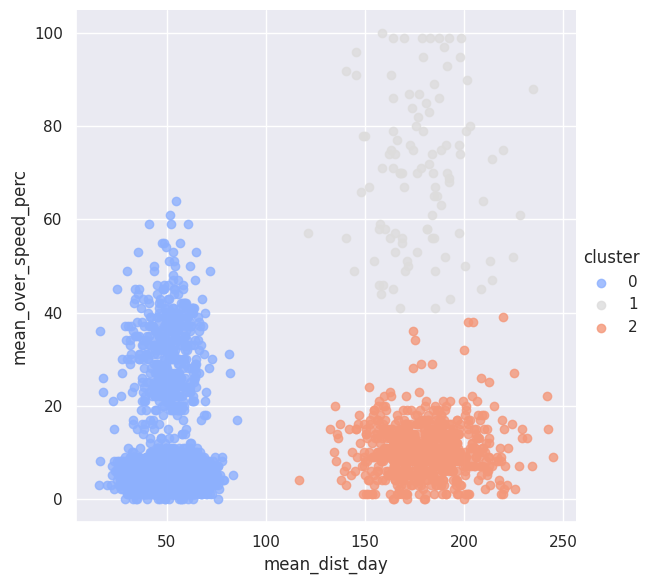

In [26]:
df_analyze['cluster'] = kmeans.labels_
df_analyze
sns.set_style('darkgrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=df_analyze, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg= False)

In [27]:
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id', axis=1))
print(kmeans_4.cluster_centers_)
print(kmeans_4.labels_)
unique, counts = np.unique(kmeans_4.labels_, return_counts=True)
print(zip(unique, counts))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
[3 3 3 ... 1 1 1]


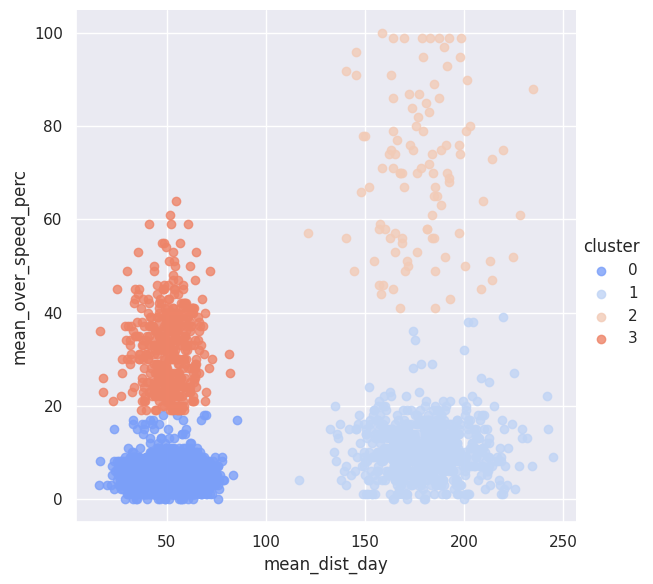

In [28]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('darkgrid')
sns.lmplot(x='mean_dist_day', y='mean_over_speed_perc', data=df_analyze, hue='cluster', palette='coolwarm', height=6, aspect=1, fit_reg= False)
#